In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [63]:
data_frame = pd.read_csv("./train.csv")
data_frame.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [64]:
data_frame.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [65]:
data_frame.shape

(1460, 81)

In [66]:
data_frame.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

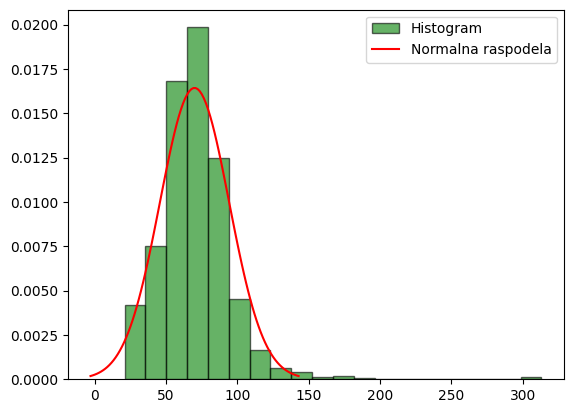

In [67]:
# Crtanje histograma
plt.hist(data_frame["LotFrontage"], bins=20, density=True, alpha=0.6, color='g', edgecolor='black', label='Histogram')

# Izračunavanje srednje vrednosti i standardne devijacije
mean = data_frame["LotFrontage"].mean()
std_dev = data_frame["LotFrontage"].std()

# Kreiranje niza vrednosti za x osu
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)

# Računanje vrednosti funkcije normalne raspodele za svaku vrednost x
y = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Crtanje funkcije normalne raspodele
plt.plot(x, y, color='r', label='Normalna raspodela')

# Dodavanje legendi
plt.legend()

# Prikazivanje grafikona
plt.show()

In [70]:
mean = data_frame["LotFrontage"].mean()
std_dev = data_frame["LotFrontage"].std()

# Definišite granicu za outlayere
threshold = 3 * std_dev

# Postavite outlayere veće od 3 standardne devijacije na granicu od 3 standardne devijacije
data_frame["LotFrontage"] = np.where(data_frame["LotFrontage"] > mean + threshold, mean + threshold, data_frame["LotFrontage"])

In [73]:
data_frame["LotFrontage"].fillna(mean, inplace=True)

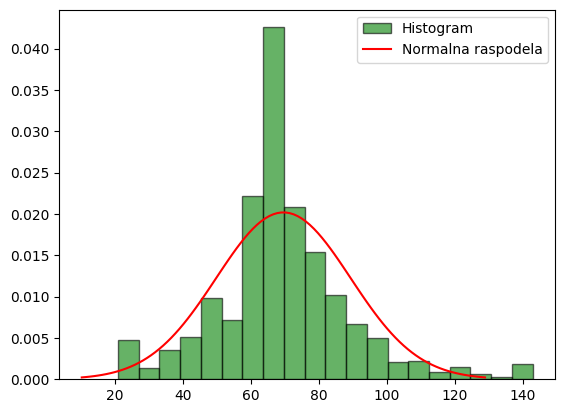

In [74]:
# Crtanje histograma
plt.hist(data_frame["LotFrontage"], bins=20, density=True, alpha=0.6, color='g', edgecolor='black', label='Histogram')

# Izračunavanje srednje vrednosti i standardne devijacije
mean = data_frame["LotFrontage"].mean()
std_dev = data_frame["LotFrontage"].std()

# Kreiranje niza vrednosti za x osu
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)

# Računanje vrednosti funkcije normalne raspodele za svaku vrednost x
y = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Crtanje funkcije normalne raspodele
plt.plot(x, y, color='r', label='Normalna raspodela')

# Dodavanje legendi
plt.legend()

# Prikazivanje grafikona
plt.show()